In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import shared

ve_or_ju = "ve"

In [2]:
running_order = pd.read_csv(f'data/running_order_j2019_{ve_or_ju}.tsv', delimiter="\t")
display(running_order.shape)

(5897, 7)

In [3]:
running_order["leg_nro"] = running_order["leg"]
running_order["orig_name"] = running_order["name"]
running_order["name"] = running_order["name"].str.lower()

In [4]:
running_order.head()

,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson
4,3,MS Parma 1,MS Parma,FIN,1,6.0,anastasia rudnaya,1,Anastasia Rudnaya


In [5]:
predictions_and_history = pd.read_csv(f"data/simple_preds_for_runners_with_history_14062019_{ve_or_ju}.csv", delimiter="\t")
display(predictions_and_history.shape)
predictions_and_history.head()


(14424, 12)

,Unnamed: 0,mean_team_id,num_valid_times,mean_pace,stdev,log_stdev,prior_mean,prior_log_std,predicted_log_pace_mean,predicted_log_pace_std,name,teams
0,0,7.0,3,6.649,0.404,0.0598,7.0016,0.1016,1.8926,0.0598,anna mårsell,STORA TUNA OK
1,1,27.5,6,7.096,0.609,0.0886,6.5398,0.1236,1.9556,0.0886,magdalena olsson,IFK MORAS OK;STORA TUNA OK
2,2,3.0,1,5.944,0.000,0.0000,6.8713,0.1366,1.7824,0.0000,julia jakob,STORA TUNA OK
3,3,8.5,6,6.077,0.362,0.0586,6.6244,0.1289,1.8027,0.0586,tove alexandersson,STORA TUNA OK
4,4,61.0,3,7.328,0.845,0.1119,7.7418,0.1145,1.9854,0.1119,lisa holer,EKSJÖ SOK;GÖTEBORG MAJORNA OK


In [6]:

predictions_and_history["num_runs"] = predictions_and_history["num_valid_times"]
no_history_row = pd.DataFrame([[0, 0, 0]], columns=["predicted_log_pace_mean", "predicted_log_pace_std", "num_valid_times"])
def get_history_and_preds(running_order_row):
    history_row = shared.get_matching_history_row_for_runner(running_order_row, predictions_and_history, no_history_row)
    #print(f"estimate_row log_means {history_row.log_means} {history_row.log_stdevs}")
    pred_log_mean = history_row.predicted_log_pace_mean.values[0]
    pred_log_std = history_row.predicted_log_pace_std.values[0]
    num_valid_times = history_row.num_valid_times.values[0]
    return pd.Series({"pred_log_mean": pred_log_mean, "pred_log_std": pred_log_std, "num_valid_times": num_valid_times})

history_and_preds = running_order.apply(lambda row: get_history_and_preds(row), axis=1)
running_order = running_order.assign(num_runs = history_and_preds.num_valid_times)
running_order = running_order.assign(pred_log_mean = history_and_preds.pred_log_mean)
running_order = running_order.assign(pred_log_std = history_and_preds.pred_log_std)



name 'sanna timonen' team_name 'MAASOTAKOULU LPR'
by_name 0 by_name_and_colon 5 runners 2
Duplicate runner       Unnamed: 0  mean_team_id  num_valid_times  mean_pace  stdev  log_stdev  \
7350        7350         501.0                1     13.403    0.0        0.0   
7353        7353         777.0                1     10.631    0.0        0.0   

      prior_mean  prior_log_std  predicted_log_pace_mean  \
7350     10.7674         0.1534                   2.5955   
7353     12.7994         0.2026                   2.3638   

      predicted_log_pace_std                                   name  \
7350                     0.0         sanna timonen:MAASOTAKOULU LPR   
7353                     0.0  sanna timonen:MAASOTAKOULU LPR VENLAT   

                        teams  num_runs  
7350         MAASOTAKOULU LPR         1  
7353  MAASOTAKOULU LPR VENLAT         1  
name 'sanna valkonen' team_name 'KAUKAAN LYLY'
by_name 0 by_name_and_colon 3 runners 2
Duplicate runner       Unnamed: 0  mean_team

In [7]:

(top_countries, top_first_names) = shared.read_persisted_dummy_column_values(ve_or_ju)

In [8]:
features = shared.preprocess_features(running_order, top_countries, ve_or_ju)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5897 entries, 0 to 5896
Data columns (total 12 columns):
team_id           5897 non-null int64
team              5897 non-null object
team_base_name    5897 non-null object
team_country      5897 non-null object
leg               5897 non-null int64
leg_dist          5897 non-null float64
name              5897 non-null object
leg_nro           5897 non-null int64
orig_name         5897 non-null object
num_runs          5897 non-null float64
pred_log_mean     5845 non-null float64
pred_log_std      5845 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 552.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 3 columns):
first_name           930 non-null object
fn_pace_class        931 non-null int64
fn_pace_std_class    931 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.9+ KB


None

[]

In [9]:
features.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
RangeIndex: 5897 entries, 0 to 5896
Data columns (total 40 columns):
team_id                  5897 non-null Sparse[int64, nan]
team_id_log10            5897 non-null Sparse[float64, nan]
team_id_square           5897 non-null Sparse[int64, nan]
leg_1                    5897 non-null Sparse[uint8, 0]
leg_2                    5897 non-null Sparse[uint8, 0]
leg_3                    5897 non-null Sparse[uint8, 0]
leg_4                    5897 non-null Sparse[uint8, 0]
c_EST                    5897 non-null Sparse[uint8, 0]
c_FIN                    5897 non-null Sparse[uint8, 0]
c_GBR                    5897 non-null Sparse[uint8, 0]
c_LAT                    5897 non-null Sparse[uint8, 0]
c_NOR                    5897 non-null Sparse[uint8, 0]
c_OTHER                  5897 non-null Sparse[uint8, 0]
c_RUS                    5897 non-null Sparse[uint8, 0]
c_SUI                    5897 non-null Sparse[uint8, 0]
c_SWE                    5897 no

In [10]:

#gbr_sd_estimate = shared.predict_without_history(features)
gbr_sd_estimate = shared.predict_without_history(features, ve_or_ju)

,log_q_low,predicted,log_q_high,log_std
0,1.881,6.512,1.979,0.049
1,1.765,6.993,1.962,0.098
2,1.799,6.569,2.019,0.110
3,1.792,6.291,1.974,0.091
4,1.875,6.891,2.003,0.064
5,1.808,7.057,2.008,0.100
6,1.851,6.850,2.108,0.128
7,1.870,6.408,2.000,0.065
8,1.862,7.863,2.040,0.089
9,1.842,6.950,2.060,0.109


0.16858493501640057

In [11]:
running_order["predicted"] = gbr_sd_estimate["predicted"]
running_order["log_q_low"] = gbr_sd_estimate["log_q_low"]
running_order["log_q_high"] = gbr_sd_estimate["log_q_high"]
running_order["log_std"] = gbr_sd_estimate["log_std"]


In [12]:
running_order.head()

,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name,num_runs,pred_log_mean,pred_log_std,predicted,log_q_low,log_q_high,log_std
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg,1.0,1.8857,0.0000,6.511986,1.881337,1.978520,0.048591
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson,6.0,1.9556,0.0886,6.992522,1.765439,1.961637,0.098099
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob,1.0,1.7824,0.0000,6.569075,1.798748,2.018901,0.110076
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson,6.0,1.8027,0.0586,6.290935,1.791712,1.973971,0.091129
4,3,MS Parma 1,MS Parma,FIN,1,6.0,anastasia rudnaya,1,Anastasia Rudnaya,4.0,1.8899,0.0639,6.891132,1.875490,2.002510,0.063510


In [13]:
running_order["log_std"].describe(percentiles=[0.01, 0.05, .25, .5, .75, .95, .99])

count    5897.000000
mean        0.168585
std         0.048381
min        -0.057098
1%          0.011062
5%          0.051215
25%         0.148965
50%         0.174903
75%         0.198787
95%         0.230691
99%         0.254032
max         0.319118
Name: log_std, dtype: float64

In [14]:
running_order["log_std_fixed"] = running_order["log_std"]
#running_order["log_std_fixed"] = np.clip(running_order["log_std"], 0.1, 0.5)
#running_order["log_std"].values[running_order["log_std"].values < 0] = 0.1

In [15]:
#def select_final_ind_preds(row):
#    return pd.Series({"pred_log_mean": pred_log_mean, "pred_log_std": pred_log_std, "num_valid_times": num_valid_times})
    
    
#final_ind_preds = running_order.apply(lambda row: select_final_ind_preds(row), axis=1)

running_order["final_pace_mean"] = np.log(running_order["predicted"])
running_order["final_pace_std"] = running_order["log_std"]
use_predicted_mean = running_order["num_runs"].values >= 1
running_order["final_pace_mean"].values[use_predicted_mean] = running_order["pred_log_mean"].values[use_predicted_mean]
use_predicted_std = running_order["num_runs"].values >= 3
running_order["final_pace_std"].values[use_predicted_std] = running_order["pred_log_std"].values[use_predicted_std]

# remove extremes from unknown runners predictions
unknown_runners = running_order["num_runs"].values < 1
running_order["final_pace_mean"].values[unknown_runners] = np.clip(running_order["final_pace_mean"].values[unknown_runners], np.log(7), np.log(15))
running_order["final_pace_std"].values[unknown_runners] = np.clip(running_order["final_pace_std"].values[unknown_runners], np.log(1.2), np.log(1.5))

# remove extremes from all runners
running_order["final_pace_mean"] = np.clip(running_order["final_pace_mean"].values, np.log(5.6), np.log(18))
running_order["final_pace_std"] = np.clip(running_order["final_pace_std"], np.log(1.07), np.log(1.6))


running_order.head().round(3)


,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name,num_runs,pred_log_mean,pred_log_std,predicted,log_q_low,log_q_high,log_std,log_std_fixed,final_pace_mean,final_pace_std
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg,1.0,1.886,0.000,6.512,1.881,1.979,0.049,0.049,1.886,0.068
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson,6.0,1.956,0.089,6.993,1.765,1.962,0.098,0.098,1.956,0.089
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob,1.0,1.782,0.000,6.569,1.799,2.019,0.110,0.110,1.782,0.110
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson,6.0,1.803,0.059,6.291,1.792,1.974,0.091,0.091,1.803,0.068
4,3,MS Parma 1,MS Parma,FIN,1,6.0,anastasia rudnaya,1,Anastasia Rudnaya,4.0,1.890,0.064,6.891,1.875,2.003,0.064,0.064,1.890,0.068


In [16]:
np.exp(running_order[["final_pace_mean", "final_pace_std"]]).describe(percentiles=[0.01, 0.02, 0.05, 0.1, .25, .5, .75, .9, .95, .99])


,final_pace_mean,final_pace_std
count,5897.000000,5897.000000
mean,11.763764,1.164852
std,2.526308,0.061550
min,5.872615,1.070000
1%,7.000000,1.070000
2%,7.291432,1.070000
5%,7.852886,1.070000
10%,8.449017,1.071972
25%,9.878142,1.109822
50%,11.655754,1.176034


In [17]:
running_order.to_csv(f"data/running_order_2019_with_estimates_{ve_or_ju}.tsv", "\t")

In [18]:
running_order[running_order['team'].str.contains("Reak")].round(2)

,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name,num_runs,pred_log_mean,pred_log_std,predicted,log_q_low,log_q_high,log_std,log_std_fixed,final_pace_mean,final_pace_std


In [19]:
running_order[
    ['num_runs', 'pred_log_mean', "pred_log_std", "predicted", "log_std_fixed", "final_pace_mean", "final_pace_std"]
].groupby('num_runs').agg(["mean"]).round(2)



,pred_log_mean,pred_log_std,predicted,log_std_fixed,final_pace_mean,final_pace_std
,mean,mean,mean,mean,mean,mean
num_runs,,,,,,
0.0,0.00,0.00,12.58,0.16,2.50,0.20
1.0,2.47,0.00,12.48,0.18,2.46,0.18
2.0,2.48,0.07,12.09,0.18,2.47,0.18
3.0,2.45,0.10,11.99,0.17,2.45,0.11
4.0,2.41,0.10,11.74,0.16,2.41,0.11
5.0,2.40,0.11,11.54,0.17,2.40,0.11
6.0,2.36,0.11,11.06,0.17,2.36,0.11
7.0,2.36,0.11,11.07,0.16,2.36,0.11


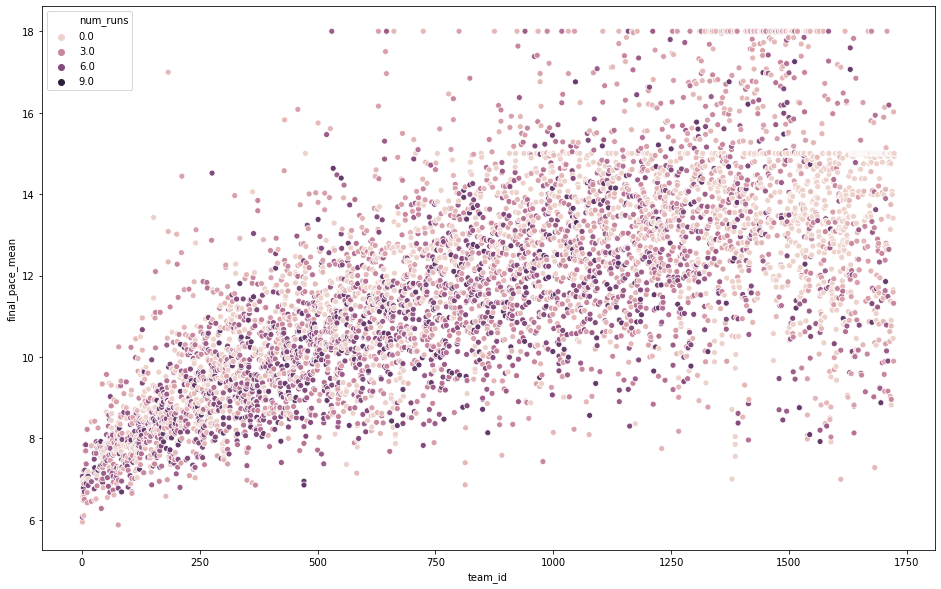

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=np.exp(running_order.final_pace_mean), hue="num_runs", data=running_order)


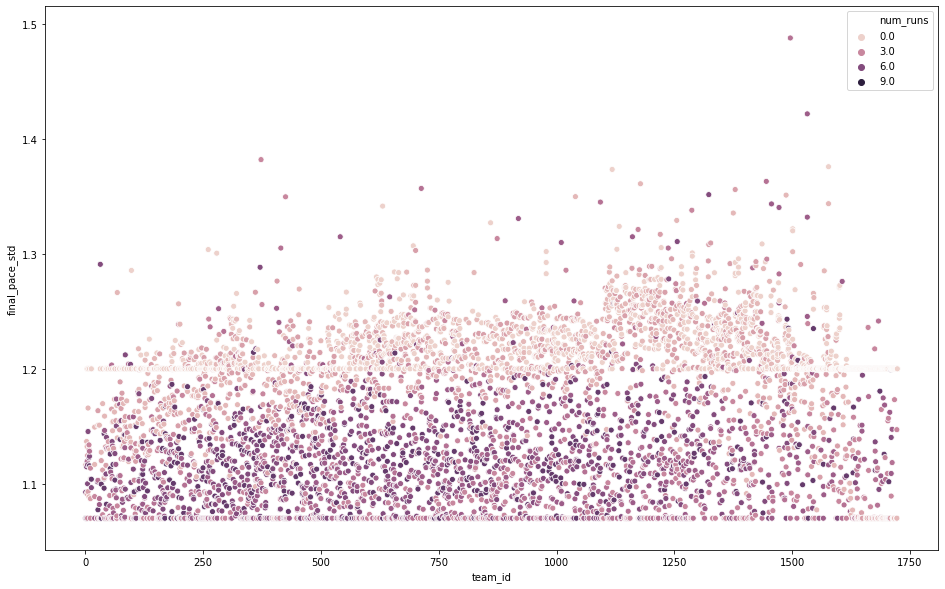

In [21]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=np.exp(running_order.final_pace_std), hue="num_runs", data=running_order)
